## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
  Attempting uninstall: scikit-learn
    Found existing installat

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [ ]:
#mouting the google drive to get data set
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copying data into a df data frame obj
data=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/EasyVisa.csv")
df=data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head() #Top 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape #to get total no of rows and columns

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
df.info()
#Looks like there are 9 string columns and 2 integer and 1 float columns and all of them are non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()
#ensuring none of the columns are null

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.duplicated().sum()
#No duplicates as well

np.int64(0)

In [ ]:
df.nunique()
#No of unique rows for every column

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe().T # to get statistical summary for numerical columns

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
df.drop(["case_id"], axis=1, inplace=True)
#dropping case id column as it doesnt add any value
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Fixing the negative values in number of employees columns

In [ ]:
df.loc[df['no_of_employees']<0].shape  # no of rows that hav a negative value for no of employees column

(33, 11)

In [ ]:
df1=df[df['no_of_employees'] < 0]
print(df1['no_of_employees'].count())
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = abs(df.loc[df['no_of_employees'] < 0, 'no_of_employees'])
# find the -ve values first, locate those indexes and replace the absolute value of them and store it back intoour copied data frame

33


In [ ]:
#df["no_of_employees"] = abs(df["no_of_employees"])
df['no_of_employees'].isnull().sum()
df.loc[df['no_of_employees']<0].shape
#All 33 has been updated

(0, 11)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
cols=df.select_dtypes("object")
for columnval in cols:
  print("Result summary for column:",columnval)
  print(df[columnval].value_counts())

Result summary for column: continent
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
Result summary for column: education_of_employee
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
Result summary for column: has_job_experience
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
Result summary for column: requires_job_training
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
Result summary for column: region_of_employment
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
Result summary for column: unit_of_wage
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
Result summary for column: full_time_position
full_t

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

<ipython-input-18-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


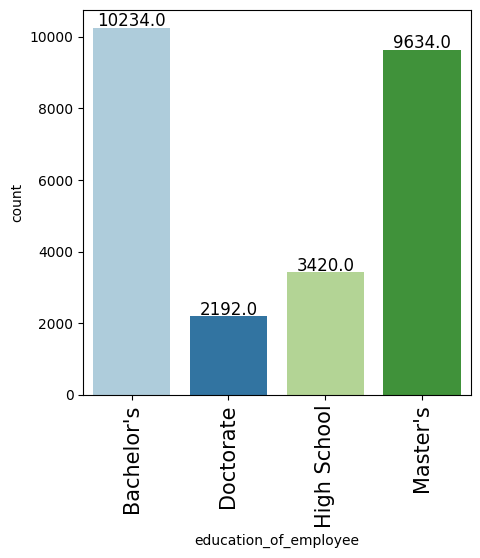

In [ ]:
labeled_barplot(df,'education_of_employee');
#Applicants who have applied for visa are either bachelors or masters

#### Observations on region of employment

<ipython-input-18-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


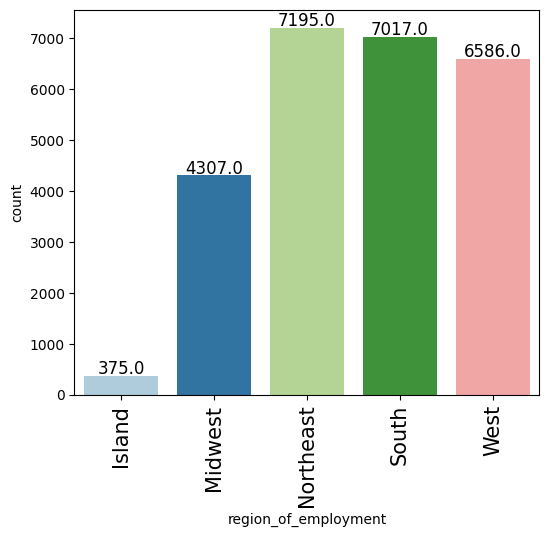

In [ ]:
labeled_barplot(df,'region_of_employment')
#Most of applicants are from Northeast region of employment

#### Observations on job experience

<ipython-input-18-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


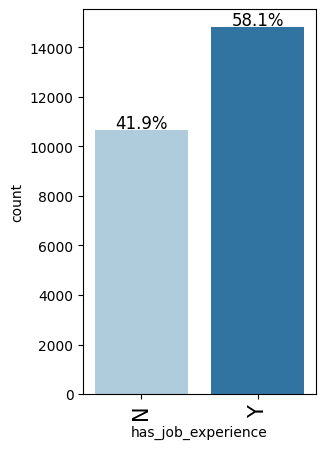

In [ ]:
 labeled_barplot(df,'has_job_experience',perc=True)
 #58% of them has a job experience

#### Observations on case status

<ipython-input-18-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


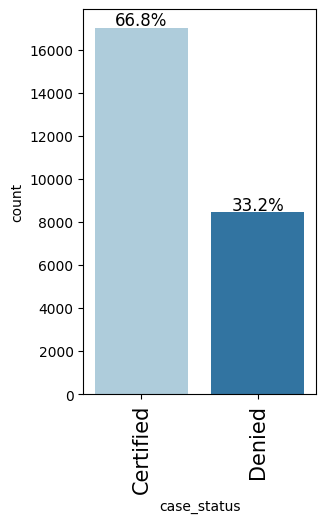

In [ ]:
 labeled_barplot(df,'case_status',perc=True)
 #There are 66% of the records have got their status certified so far

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


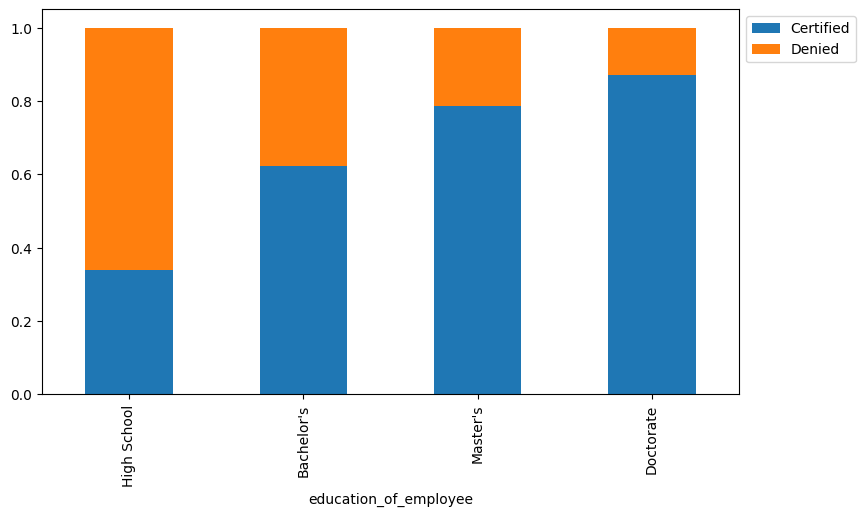

In [ ]:
stacked_barplot(df,'education_of_employee','case_status')
#For those with a PhD degree, there are high chances of getting it approved then followed by masters and so on

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


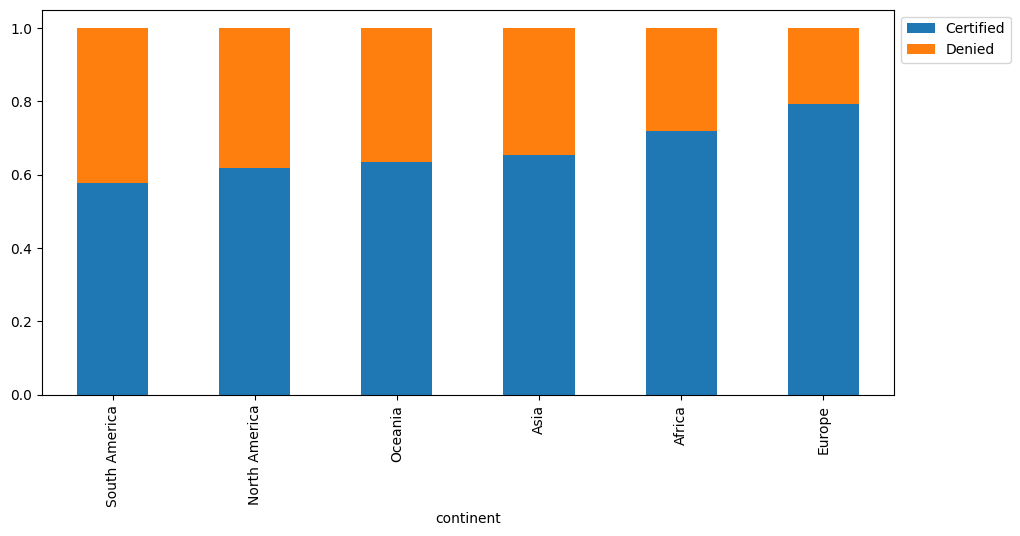

In [ ]:
stacked_barplot(df,'continent','case_status')
#There are 6 continents in the data set and high approval rate is from Europe

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


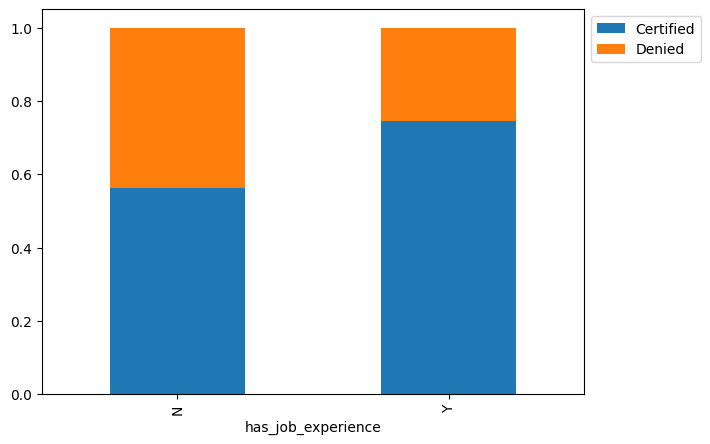

In [ ]:
stacked_barplot(df,'has_job_experience','case_status')
#Yes indeed, as seen below, having prior work experience would really help

#### Is the prevailing wage consistent across all regions of the US?

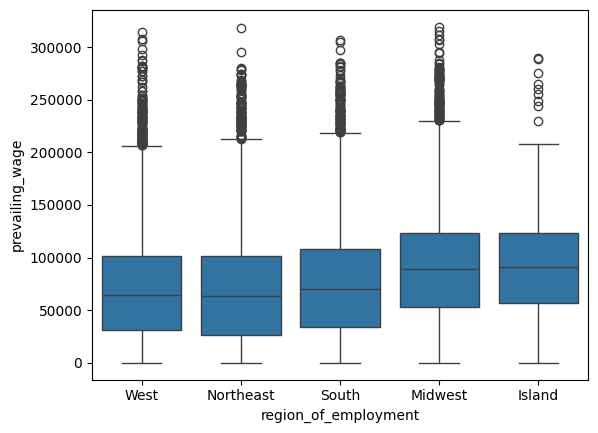

In [ ]:
sns.boxplot(data=df,x="region_of_employment",y="prevailing_wage")
plt.show()
#Looks like it is almost consistent across all regions but may be slightly more wages in both midwest and island regions as compared to other three regions.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

<ipython-input-24-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-24-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


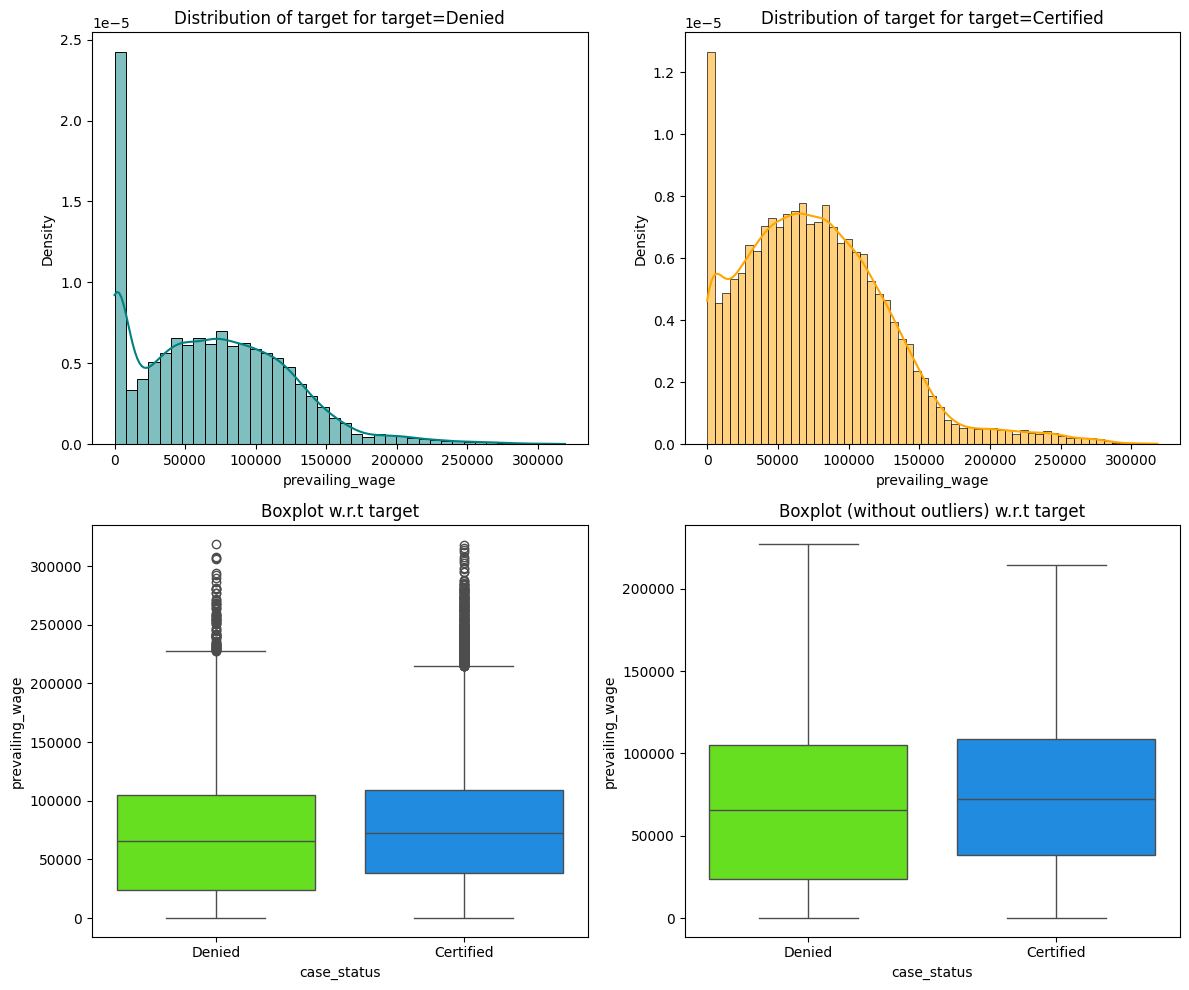

In [ ]:
distribution_plot_wrt_target(df,"prevailing_wage","case_status")
#not really its shows a equal distribution for both certified and denied with respect to the wages

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


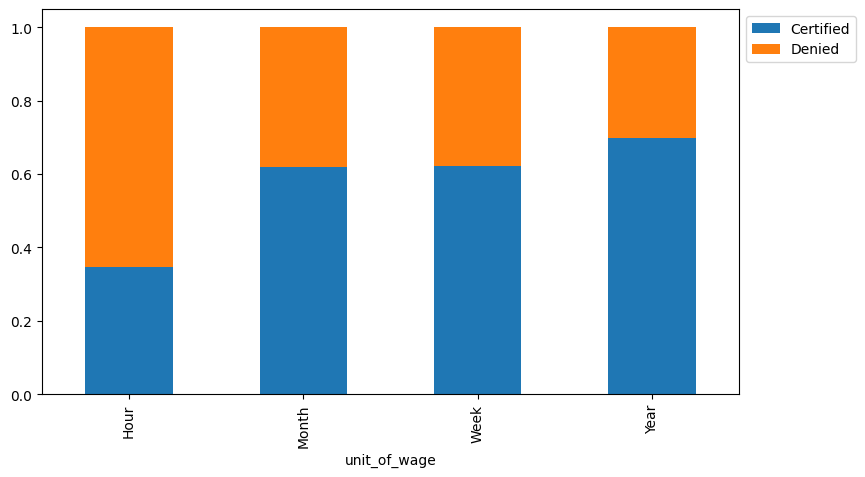

In [ ]:
stacked_barplot(df,'unit_of_wage','case_status')
#Yes definitely, those are on hourly wages, it does have a serious impact as compared to yearly based wage applicants

## Data Pre-processing

### Outlier Check

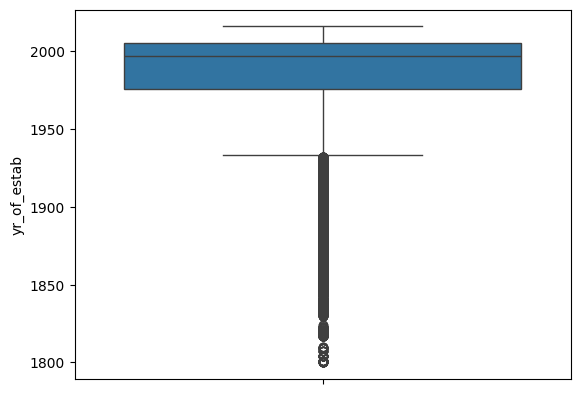

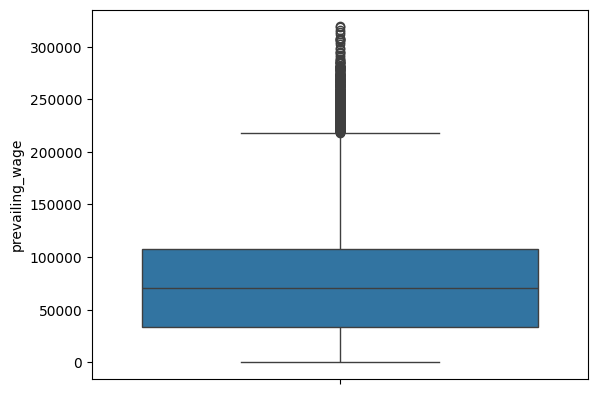

In [ ]:
# outlier detection using boxplot
sns.boxplot(df,y='yr_of_estab',showfliers=True)
plt.show()
sns.boxplot(df,y='prevailing_wage',showfliers=True)
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Data Preparation for modeling

In [ ]:
# Defined a function to change case status column values to 1 or 0- If certified its 1, if not 0
def convertCaseStatus(x):
  if x=="Certified":
   return 1
  else:
   return 0
df['case_status']=df['case_status'].apply(convertCaseStatus)

df['case_status'].value_counts()

,count
case_status,
1,17018
0,8462


In [ ]:
X = df.drop(['case_status'],axis=1) ## Complete the code to drop case status from the data
Y = df["case_status"] #target varaibale
X = pd.get_dummies(X,drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  int64  
 2   prevailing_wage                    25480 non-null  float64
 3   continent_Asia                     25480 non-null  bool   
 4   continent_Europe                   25480 non-null  bool   
 5   continent_North America            25480 non-null  bool   
 6   continent_Oceania                  25480 non-null  bool   
 7   continent_South America            25480 non-null  bool   
 8   education_of_employee_Doctorate    25480 non-null  bool   
 9   education_of_employee_High School  25480 non-null  bool   
 10  education_of_employee_Master's     25480 non-null  bool   
 11  has_job_experience_Y               25480 non-null  boo

In [ ]:
#Splitting the data into three sets: Train,validation and test
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)
#Splitting the data into 75-25 ratio between train and validation sets above
# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,Y_val,Y_test = train_test_split(
    X_val,Y_val,test_size=0.25,random_state=1,stratify=Y_val
)
#Split the validation of 25% into 25% for test and 75% for validation

In [ ]:
print("Total shape of data set",X.shape)
print("Training set shape of data set",X_train.shape)
print("Validation set shape of data set",X_val.shape)
print("Test set shape of data set",X_test.shape)

Total shape of data set (25480, 21)
Training set shape of data set (19110, 21)
Validation set shape of data set (4777, 21)
Test set shape of data set (1593, 21)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer=metrics.make_scorer(metrics.recall_score)
scorer
#Choose recall score as I would want to eliminate false negatives- Like original certified applicants with non certified values

make_scorer(recall_score, response_method='predict')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19110 entries, 19474 to 22922
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    19110 non-null  int64  
 1   yr_of_estab                        19110 non-null  int64  
 2   prevailing_wage                    19110 non-null  float64
 3   continent_Asia                     19110 non-null  bool   
 4   continent_Europe                   19110 non-null  bool   
 5   continent_North America            19110 non-null  bool   
 6   continent_Oceania                  19110 non-null  bool   
 7   continent_South America            19110 non-null  bool   
 8   education_of_employee_Doctorate    19110 non-null  bool   
 9   education_of_employee_High School  19110 non-null  bool   
 10  education_of_employee_Master's     19110 non-null  bool   
 11  has_job_experience_Y               19110 non-null  bool

In [ ]:
columns_with_nan = X_train.columns[X_train.isnull().any()].tolist()
print(columns_with_nan)
#there are no missing values in any column which is great

[]


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [ ]:
modelDT=DecisionTreeClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelDT, X=X_train, y=Y_train, scoring = scorer,cv=kfold)
print("cross validation performance for Decision tree is:",cv_result.mean())
modelAB=AdaBoostClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelAB, X=X_train, y=Y_train, scoring = scorer,cv=kfold)
print("cross validation performance for AdaBoost is:",cv_result.mean())
modelGB=GradientBoostingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelGB, X=X_train, y=Y_train, scoring = scorer,cv=kfold)
print("cross validation performance for Gradient boosting is:",cv_result.mean())
modelRF=RandomForestClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelRF, X=X_train, y=Y_train, scoring = scorer,cv=kfold)
print("cross validation performance for Random Forest is:",cv_result.mean())
modelBC=BaggingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelBC, X=X_train, y=Y_train, scoring = scorer,cv=kfold)
print("cross validation performance for Bagging classifier is:",cv_result.mean())

cross validation performance for Decision tree is: 0.7437115287565061
cross validation performance for AdaBoost is: 0.8873301678399128
cross validation performance for Gradient boosting is: 0.874872146236464
cross validation performance for Random Forest is: 0.8368711528756506
cross validation performance for Bagging classifier is: 0.7730152429927541


In [ ]:
from sklearn.metrics import recall_score # I had to overwrite recall score again
modelDT.fit(X_train,Y_train)
recall_DT = recall_score(Y_val, modelDT.predict(X_val))
print("Decision Tree Recall score for validation set is:",recall_DT)
modelAB.fit(X_train,Y_train)
recall_AB = recall_score(Y_val, modelAB.predict(X_val))
print("Adaboost Recall score for validation set is:",recall_AB)
modelGB.fit(X_train,Y_train)
recall_GB = recall_score(Y_val, modelGB.predict(X_val))
print("Gradient boosting Recall score for validation set is:",recall_GB)
modelRF.fit(X_train,Y_train)
recall_RF = recall_score(Y_val, modelRF.predict(X_val))
print("Random Forest Recall score for validation set is:",recall_RF)
modelBC.fit(X_train,Y_train)
recall_BC = recall_score(Y_val, modelBC.predict(X_val))
print("Bagging classifer Recall score for validation set is:",recall_BC)
#looks like Adaboost gave higher overall recall score than rest on the training data

Decision Tree Recall score for validation set is: 0.7439674083359449
Adaboost Recall score for validation set is: 0.8862425571921028
Gradient boosting Recall score for validation set is: 0.8749608273268568
Random Forest Recall score for validation set is: 0.8423691632717016
Bagging classifer Recall score for validation set is: 0.7753055468505171


### Model Building with Oversampled data

In [ ]:
#oversampling using SMOTE method to fill in 0's and store in X_train_over and Y_train_over
print("Before OverSampling, counts of label '1':", sum(Y_train ==1))
print("Before OverSampling, counts of label '0':",sum(Y_train == 0))
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, Y_train_over = sm.fit_resample(X_train, Y_train)
print("After OverSampling, counts of label '1':",sum(Y_train_over == 1))
print("After OverSampling, counts of label '0':",sum(Y_train_over == 0))
print("Total shape now is",X_train_over.shape)


Before OverSampling, counts of label '1': 12763
Before OverSampling, counts of label '0': 6347
After OverSampling, counts of label '1': 12763
After OverSampling, counts of label '0': 12763
Total shape now is (25526, 21)


In [ ]:
modelDT.fit(X_train_over,Y_train_over)
recall_DT = recall_score(Y_val, modelDT.predict(X_val))
print("Decision Tree Recall score after oversampling for validation set is:",recall_DT)
modelAB.fit(X_train_over,Y_train_over)
recall_AB = recall_score(Y_val, modelAB.predict(X_val))
print("Adaboost Recall score after oversampling for validation set is:",recall_AB)
modelGB.fit(X_train_over,Y_train_over)
recall_GB = recall_score(Y_val, modelGB.predict(X_val))
print("Gradient boosting Recall score after oversampling for validation set is:",recall_GB)
modelRF.fit(X_train_over,Y_train_over)
recall_RF = recall_score(Y_val, modelRF.predict(X_val))
print("Random Forest Recall score after oversampling for validation set is:",recall_RF)
modelBC.fit(X_train_over,Y_train_over)
recall_BC = recall_score(Y_val, modelBC.predict(X_val))
print("Bagging classifer Recall score after oversampling for validation set is:",recall_BC)
#After oversampling of data, Adaboost performance is higher on validation set as well

Decision Tree Recall score after oversampling for validation set is: 0.7389533061736133
Adaboost Recall score after oversampling for validation set is: 0.8617988091507365
Gradient boosting Recall score after oversampling for validation set is: 0.8564713256032591
Random Forest Recall score after oversampling for validation set is: 0.8288937637104355
Bagging classifer Recall score after oversampling for validation set is: 0.7624569100595424


In [ ]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25526 entries, 0 to 25525
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25526 non-null  int64  
 1   yr_of_estab                        25526 non-null  int64  
 2   prevailing_wage                    25526 non-null  float64
 3   continent_Asia                     25526 non-null  bool   
 4   continent_Europe                   25526 non-null  bool   
 5   continent_North America            25526 non-null  bool   
 6   continent_Oceania                  25526 non-null  bool   
 7   continent_South America            25526 non-null  bool   
 8   education_of_employee_Doctorate    25526 non-null  bool   
 9   education_of_employee_High School  25526 non-null  bool   
 10  education_of_employee_Master's     25526 non-null  bool   
 11  has_job_experience_Y               25526 non-null  boo

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelDT, X=X_train_over, y=Y_train_over, scoring = scorer,cv=kfold)
print("After oversampling the score for Decision tree is:",cv_result.mean())
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelAB, X=X_train_over, y=Y_train_over, scoring = scorer,cv=kfold)
print("After oversampling the score for AdaBoost is:",cv_result.mean())
modelGB=GradientBoostingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelGB, X=X_train_over, y=Y_train_over, scoring = scorer,cv=kfold)
print("After oversampling the score for Gradient boosting is:",cv_result.mean())
modelRF=RandomForestClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelRF, X=X_train_over, y=Y_train_over, scoring = scorer,cv=kfold)
print("After oversampling the score for Random Forest is:",cv_result.mean())
modelBC=BaggingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelBC, X=X_train_over, y=Y_train_over, scoring = scorer,cv=kfold)
print("After oversampling the score for Bagging classifier is:",cv_result.mean())

After oversampling the score for Decision tree is: 0.7202041485399807
After oversampling the score for AdaBoost is: 0.8553635651461737
After oversampling the score for Gradient boosting is: 0.8554401853127491
After oversampling the score for Random Forest is: 0.8172048496636203
After oversampling the score for Bagging classifier is: 0.7460616436253618


### Model Building with Undersampled data

In [ ]:
# Random undersampler is to reduce the count of 1s by removing the data to balance 0s
print("Before UnderSampling, counts of label '1':",sum(Y_train == 1))
print("Before UnderSampling, counts of label '0':",sum(Y_train == 0))
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, Y_train_under = rus.fit_resample(X_train, Y_train)
print("After UnderSampling, counts of label '1':",sum(Y_train_under == 1))
print("After UnderSampling, counts of label '0':",sum(Y_train_under == 0))

Before UnderSampling, counts of label '1': 12763
Before UnderSampling, counts of label '0': 6347
After UnderSampling, counts of label '1': 6347
After UnderSampling, counts of label '0': 6347


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelDT, X=X_train_under, y=Y_train_under, scoring = scorer,cv=kfold)
print("After undersampling the score for Decision tree is:",cv_result.mean())
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelAB, X=X_train_under, y=Y_train_under, scoring = scorer,cv=kfold)
print("After undersampling the score for AdaBoost is:",cv_result.mean())
modelGB=GradientBoostingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelGB, X=X_train_under, y=Y_train_under, scoring = scorer,cv=kfold)
print("After undersampling the score for Gradient boosting is:",cv_result.mean())
modelRF=RandomForestClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelRF, X=X_train_under, y=Y_train_under, scoring = scorer,cv=kfold)
print("After undersampling the score for Random Forest is:",cv_result.mean())
modelBC=BaggingClassifier(random_state=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # This is used to treat imbalanced data for case status target variable and a classification problem
cv_result = cross_val_score(estimator=modelBC, X=X_train_under, y=Y_train_under, scoring = scorer,cv=kfold)
print("After undersampling the score for Bagging classifier is:",cv_result.mean())

After undersampling the score for Decision tree is: 0.6269074167147546
After undersampling the score for AdaBoost is: 0.7206503974237263
After undersampling the score for Gradient boosting is: 0.7376665860029907
After undersampling the score for Random Forest is: 0.6828387409020681
After undersampling the score for Bagging classifier is: 0.6023268368049738


In [ ]:
modelDT.fit(X_train_under,Y_train_under)
recall_DT = recall_score(Y_val, modelDT.predict(X_val))
print("Decision Tree Recall score after undersampling for validation set is:",recall_DT)
modelAB.fit(X_train_under,Y_train_under)
recall_AB = recall_score(Y_val, modelAB.predict(X_val))
print("Adaboost Recall score after undersampling for validation set is:",recall_AB)
modelGB.fit(X_train_under,Y_train_under)
recall_GB = recall_score(Y_val, modelGB.predict(X_val))
print("Gradient boosting Recall score after undersampling for validation set is:",recall_GB)
modelRF.fit(X_train_under,Y_train_under)
recall_RF = recall_score(Y_val, modelRF.predict(X_val))
print("Random Forest Recall score after undersampling for validation set is:",recall_RF)
modelBC.fit(X_train_under,Y_train_under)
recall_BC = recall_score(Y_val, modelBC.predict(X_val))
print("Bagging classifer Recall score after undersampling for validation set is:",recall_BC)
#This clearly indicates that Adaboost on oversampling worked better on validation set

Decision Tree Recall score after undersampling for validation set is: 0.6258226261360075
Adaboost Recall score after undersampling for validation set is: 0.7333124412409903
Gradient boosting Recall score after undersampling for validation set is: 0.7355061109370103
Random Forest Recall score after undersampling for validation set is: 0.7010341585709808
Bagging classifer Recall score after undersampling for validation set is: 0.619554998433093


## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [50,75,100],
    "learning_rate": [1,0.1,0.01],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Perform GridSearch with cross-validation
random_grid_search = RandomizedSearchCV(modelAB, param_grid, cv=5)
random_grid_search.fit(X_train_over, Y_train_over)

# Best parameters and score
print("Best parameters:", random_grid_search.best_params_)
print("Best recall score is:", random_grid_search.best_estimator_)

Best parameters: {'n_estimators': 50, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}
Best recall score is: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=1, random_state=1)


In [ ]:
modelAB=AdaBoostClassifier(n_estimators=100,learning_rate=1,estimator= DecisionTreeClassifier(max_depth=3, random_state=1))
modelAB.fit(X_train_over,Y_train_over)
adaboost_perforamnce = model_performance_classification_sklearn(modelAB, X_train_over, Y_train_over)
adaboost_perforamnce
#This is the performance of oversampling for Adaboost

,Accuracy,Recall,Precision,F1
0,0.79421,0.837421,0.770806,0.802734


In [ ]:
#Since gradient boosting classifier performed second best in oversampling
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "max_features": ['sqrt']
}

# Perform GridSearch with cross-validation
random_grid_search_GB = RandomizedSearchCV(modelGB, param_grid, cv=5)
random_grid_search_GB.fit(X_train_over, Y_train_over)

# Best parameters and score
print("Best parameters:", random_grid_search_GB.best_params_)

Best parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'learning_rate': 0.1}


In [ ]:
#Evaluating Random Forest oversampling
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125],
    "min_samples_leaf": [1,2,5,10],
    "max_features": ['sqrt'],
    "max_samples":[0.5,0.6]
}

# Perform GridSearch with cross-validation
random_grid_search_RF = RandomizedSearchCV(modelRF, param_grid, cv=5)
random_grid_search_RF.fit(X_train_over, Y_train_over)

# Best parameters and score
print("Best parameters:", random_grid_search_RF.best_params_)

Best parameters: {'n_estimators': 75, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'}


In [ ]:
modelGB=GradientBoostingClassifier(n_estimators=500,max_features='sqrt',learning_rate=0.1)
modelGB.fit(X_train_over,Y_train_over)
Gradientboost_perforamnce = model_performance_classification_sklearn(modelGB, X_train_over, Y_train_over)
Gradientboost_perforamnce

,Accuracy,Recall,Precision,F1
0,0.809841,0.865549,0.77878,0.819875


In [ ]:
modelRF=RandomForestClassifier(n_estimators=75,max_features='sqrt',min_samples_leaf=2,max_samples=0.6)
modelRF.fit(X_train_over,Y_train_over)
RandomForest_perforamnce = model_performance_classification_sklearn(modelRF, X_train_over, Y_train_over)
RandomForest_perforamnce

,Accuracy,Recall,Precision,F1
0,0.877928,0.918514,0.849554,0.88269


## Model Performance Summary and Final Model Selection

In [ ]:
#Clearly on the oversampling data after hyperparameter tuning, Gradient boost classifier worked better with recall score of 0.86 whereas Adaboost classifier with hyperparamters gave recall score of 0.83
final_test_evaluation_GB = model_performance_classification_sklearn(modelGB, X_test, Y_test)
print("Final test results for Gradient boosting")
print(final_test_evaluation_GB)
final_test_evaluation_AB = model_performance_classification_sklearn(modelAB, X_test, Y_test)
print("Final test results for Ada boosting")
print(final_test_evaluation_AB)
final_test_evaluation_RF = model_performance_classification_sklearn(modelRF, X_test, Y_test)
print("Final test results for Random Forest")
print(final_test_evaluation_RF)

Final test results for Gradient boosting
   Accuracy    Recall  Precision        F1
0  0.736347  0.847744   0.777586  0.811151
Final test results for Ada boosting
   Accuracy    Recall  Precision        F1
0   0.73258  0.832707   0.781305  0.806187
Final test results for Random Forest
   Accuracy    Recall  Precision        F1
0  0.730069  0.835526   0.777098  0.805254


## Actionable Insights and Recommendations

# Evaluated clearly with oversampling and undersampling of data for all the models






1. On just training data without oversampling and undersampling, Adaboost  provided higher recall scores followed by random Forest and Gradient boosting
2. Even after oversampling/undersampling, Adaboost provided higher recall score than rest
3. Coming to EDA, Applicants with PhD degree holders has got a higher approval rates as compared to rest and masters degree holders has the second best approval rates
4. Applicants with job experience has a greater chances of approval definitely
5. Those who are earning wages as per hour like contract based employees will likely have a lesser chances of approval
6. Applicants coming from Europe continent has a higher chances of approval as compared to the south america which is the least of all 6 continents in the data set.

Finally, with these features we can clearly say that they play a crucial role in determining the case status

